In [1]:
# import argparse
# import time
# from pathlib import Path
# 
# import cv2
# import torch
# import torch.backends.cudnn as cudnn
# 
# from models.experimental import attempt_load
# from utils.datasets import LoadStreams, LoadImages
# from utils.general import check_img_size, check_requirements, check_imshow, non_max_suppression, apply_classifier, \
#     scale_coords, xyxy2xywh, strip_optimizer, set_logging, increment_path, save_one_box
# from utils.plots import colors, plot_one_box
# from utils.torch_utils import select_device, load_classifier, time_synchronized

In [2]:
#读取012标签
import pandas
import pandas as pd
excel_path=r"D:\PycharmProjects\opencv_handle_364\yolov5_perforation\打分比例表-并列2013 -汇总分表注明1208－朱.xlsx"
data = pandas.read_excel(excel_path,engine='openpyxl')
data=data[['图像名称','齿孔']]
data=data.dropna()
def dele(df):
    df=df[:-3]
    df.replace('(','（')
    df.replace(')','）')
    return df
data['图像名称']=data['图像名称'].apply(dele)
data['图像名称'].astype('str')

data=data.rename({'图像名称':'名称'},axis=1)
data=data.dropna()

def caonima(df):
    if df['名称'][-3:]!='（2）':
        df['名称']=df['名称']+"（2）"
    return df
data1=data.copy().apply(caonima,axis=1)


def fuck(df):
    if df[-3:]=='（2）':
        print(df)
#data['名称'].apply(fuck)

data2=pd.concat([data,data1])

#最终标签data2

In [6]:
import os
#path="/media/mtc206/2TB/wjn/yolov5/beifen/yolov5/runs/detect/exp37/labels/"
path=r"D:\PycharmProjects\opencv_handle_364\yolov5_perforation\runs\detect\exp37\labels"
a=set()
for i in os.listdir(path):
    a.add(i[:-5])
#print(a)
import re
d=[]
for i in a:
    b=[]
    for j in os.listdir(path):
        c=[]
        if(j[-4:]!='.txt'):
            continue
        if(i==j[:-5]):
            txt_name = j[:-4] + ".txt"
            # save_path = r".\stamp_myhandle", save_stamp_info_path = r"stamp_info_txt"
            txt_path = os.path.join(path, txt_name)
            with open(txt_path, "r", encoding='gbk') as fr:
                for line in fr.readlines():
                    line = line.strip()
                    line_list = line.split(" ")
                    xml_w = float(line_list[-2])
                    xml_h = float(line_list[-1])
                    xml_length=max(xml_w,xml_h)
                    xml_area=xml_w*xml_h
                    c=[xml_length,xml_area]
                    b.append(c)
    d.append(b)
zip(list(a),d)

k={}
for i in range(a.__len__()):
    k[list(a)[i]]=d[i]
for i in os.listdir(r"D:\PycharmProjects\opencv_handle_364\yolov5_perforation\runs\detect\exp37"):
    if i[-3:]!='jpg':
        continue
    if i[:-5] not in list(k.keys()):
        k.update({i[:-5]:[]})
        #print(1)
list_length=[]
list_area=[]
list_number=[]
for i in k:
    max_length=0
    area=0
    n=0
    for j in k[i]:
        max_length=max(max_length,j[0])
        area+=j[1]
        n+=1
    list_length.append(max_length)
    list_area.append(area)
    list_number.append(n)
    
df=pd.DataFrame()
df['名称']=list(k.keys())
df['最大长']=list_length
df['面积']=list_area
df['个数']=list_number
print("df",df)

df                  名称       最大长        面积  个数
0     2010-16（4-4）6  0.482500  0.182174   1
1     2006-16（5-5）7  0.293902  0.009662   1
2     2013-6（12-1）4  0.459153  0.168370   2
3            和个性化59  0.312856  0.009029   1
4          盘锦红海滩（2）  0.808994  0.315617   1
...             ...       ...       ...  ..
2003           正5-1  0.000000  0.000000   0
2004         盘锦红海滩1  0.000000  0.000000   0
2005         盘锦红海滩4  0.000000  0.000000   0
2006         贺卡3（2）  0.000000  0.000000   0
2007             黑船  0.000000  0.000000   0

[2008 rows x 4 columns]


In [8]:
#合并
ans=pd.merge(data2,df,how='right')
ans=ans.dropna()
ans=ans.rename({'名称':'name','齿孔':'chikong','最大长':'zuidachang','面积':'area','个数':'number'},axis=1)
ans=ans.dropna()
print(ans)

               name chikong  zuidachang      area  number
0     2010-16（4-4）6       2    0.482500  0.182174       1
1     2006-16（5-5）7       1    0.293902  0.009662       1
2     2013-6（12-1）4       2    0.459153  0.168370       2
3            和个性化59       1    0.312856  0.009029       1
6     2013-6（12-4）8       2    0.744798  0.339257       1
...             ...     ...         ...       ...     ...
2204          普美丽中国       2    0.000000  0.000000       0
2207         盘锦红海滩1       2    0.000000  0.000000       0
2208         盘锦红海滩4       2    0.000000  0.000000       0
2209         贺卡3（2）       1    0.000000  0.000000       0
2210             黑船       2    0.000000  0.000000       0

[2111 rows x 5 columns]


numerical_cols Index(['chikong', 'zuidachang', 'area', 'number'], dtype='object')
train = ans                name  chikong  zuidachang      area  number
0     2010-16（4-4）6      2.0    0.482500  0.182174       1
1     2006-16（5-5）7      1.0    0.293902  0.009662       1
2     2013-6（12-1）4      2.0    0.459153  0.168370       2
3            和个性化59      1.0    0.312856  0.009029       1
6     2013-6（12-4）8      2.0    0.744798  0.339257       1
...             ...      ...         ...       ...     ...
2204          普美丽中国      2.0    0.000000  0.000000       0
2207         盘锦红海滩1      2.0    0.000000  0.000000       0
2208         盘锦红海滩4      2.0    0.000000  0.000000       0
2209         贺卡3（2）      1.0    0.000000  0.000000       0
2210             黑船      2.0    0.000000  0.000000       0

[2111 rows x 5 columns]
feature_cols ['zuidachang', 'number']
X_data = train['chikong']       zuidachang  number
0       0.482500       1
1       0.293902       1
2       0.459153       2
3       0

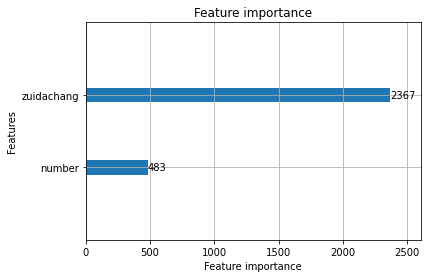

In [20]:
#模型训练
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import math
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## 模型预测的
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

## 数据降维处理的
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

import lightgbm as lgb
import xgboost as xgb

## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error ,accuracy_score

numerical_cols =ans.select_dtypes(exclude = 'object').columns
print("numerical_cols", numerical_cols)
ans['chikong']=ans['chikong'].astype(float)
#train=ans[:int(0.9*len(ans))]
train=ans
print("train = ans", train)
test=ans[int(0.9*len(ans)):]
feature_cols = [col for col in numerical_cols if col not in ['label']]
feature_cols = [col for col in feature_cols if 'chikong' not in col]
feature_cols = [col for col in feature_cols if 'area' not in col]
print("feature_cols", feature_cols)
## 提前特征列，标签列构造训练样本和测试样本
X_data = train[feature_cols]
# print("X_data = train[feature_cols]", X_data)
Y_data = train['chikong']
print("X_data = train['chikong']", X_data)
X_test  = test[feature_cols]
# print("X_test = test[feature_cold]", X_test)

print('X train shape:',X_data.shape)
print('X test shape:',X_test.shape)


def Sta_inf(data):
    print('_min',np.min(data))
    print('_max:',np.max(data))
    print('_mean',np.mean(data))
    print('_ptp',np.ptp(data))
    print('_std',np.std(data))
    print('_var',np.var(data))
    
x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0.3)
print("x_train", x_train)
print("y_train", y_train)
print("type(x_train)", type(x_train))
def build_model_lgb(x_train,y_train):
    score_perf_model_path1 = r"D:\PycharmProjects\opencv_handle_364\yolov5_perforation\weights\score_perf_1.model"
    if not os.path.exists(score_perf_model_path1):
        print("not os.path.exists(score_perf_model_path1)")
        estimator = lgb.LGBMRegressor(n_estimators = 150)
        param_grid = {
            'num_leaves':[20,50,127,150,200],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
        }
        gbm = GridSearchCV(estimator, param_grid)
        gbm.fit(x_train, y_train)
        print("build_model_lgb train, gbm.score(x, y) =", gbm.score(x_train, y_train))
        joblib.dump(gbm, score_perf_model_path1)
    else:
        gbm = joblib.load(score_perf_model_path1)
    
    return gbm

def build_model_lgb_c(x_train,y_train):
    score_perf_model_path2 = r"D:\PycharmProjects\opencv_handle_364\yolov5_perforation\weights\score_perf_2.model"
    if not os.path.exists(score_perf_model_path2):
        print("not os.path.exists(score_perf_model_path2)")
        estimator = lgb.LGBMClassifier(n_estimators = 150,num_class=3)
        param_grid = {
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'n_estimators' :[50,100,125,150,175],
            'reg_alpha':[0.0, 0.05, 0.1]
        }
        gbm = GridSearchCV(estimator, param_grid)
        gbm.fit(x_train, y_train)
        print("build_model_lgb_c train, gbm.score(x, y) =", gbm.score(x_train, y_train))
        joblib.dump(gbm, score_perf_model_path2)
    else:
        gbm = joblib.load(score_perf_model_path2)
    

    return gbm


print('Train lgb...')
model_lgb = build_model_lgb_c(x_train,y_train)
val_lgb_c = model_lgb.predict(x_val)
#val_lgb=[min(max(0,i),3) for i in val_lgb]
#val_lgb=[round(i) for i in val_lgb]
MAE_lgb_c = accuracy_score(y_val,val_lgb_c)
print('MAE of val with lgb:',MAE_lgb_c)



print('Train lgb...')
model_lgb = build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
val_lgb=[min(max(0,i),3) for i in val_lgb]
val_lgb=[round(i) for i in val_lgb]
MAE_lgb = accuracy_score(y_val,val_lgb)
print('MAE of val with lgb:',MAE_lgb)


from lightgbm import plot_importance
plot_importance(model_lgb.best_estimator_)



from sklearn.linear_model import LogisticRegression
import joblib
score_perf_model_path3 = r"D:\PycharmProjects\opencv_handle_364\yolov5_perforation\weights\score_perf_3.model"
if not os.path.exists(score_perf_model_path3):
    # clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
    print("not os.path.exists(score_perf_model_path3)")
    clf = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial', max_iter=100, tol=0.1)
    clf.fit(x_train, y_train)
    print("train, clf.score(x, y) =", clf.score(x_train, y_train))
    joblib.dump(clf, score_perf_model_path3)
else:
    clf = joblib.load(score_perf_model_path3)
    
# clf = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial', max_iter=100, tol=0.1)
# clf.fit(x_train, y_train)

print(clf.coef_)                    # <class 'tuple'>: (3, 4)
print(clf.intercept_)               # True


y_test = clf.predict(x_val)        # <class 'tuple'>: (45,)

count = sum(y_val == y_test)
print(count, count/len(y_test))


l=(val_lgb_c+val_lgb+np.array(y_val))/3
for i in range(l.__len__()):
    l[i]=round(l[i])
    
    
print('final acc:',sum((l== y_test))/len(y_test))
